In [1]:
import pandas as pd

# Load the dataset
file_path = '/Users/qbs/games.csv'
games_df = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
games_df.head()

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
0,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],...,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1,655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
2,1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",...,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
3,1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
4,1139950,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.00,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",...,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import LabelEncoder

# For simplicity, let's focus on a subset of numeric features and the target variable
features = ['Required age', 'Price', 'DLC count']  # Example features
target = 'Peak CCU'  # Target variable

# Check for missing values in the selected features and target
missing_data = games_df[features + [target]].isnull().sum()
missing_data

# For this example, we will drop rows with missing values
games_df_cleaned = games_df.dropna(subset=features + [target])



In [3]:
# To resolve the issue, we will categorize 'Peak CCU' based on custom-defined thresholds
# instead of using qcut, which is causing issues due to many identical values.

def categorize_ccu(ccu):
    if ccu <= 1000:
        return "Low"
    elif ccu <= 10000:
        return "Medium"
    else:
        return "High"

games_df['CCU_Category'] = games_df['Peak CCU'].apply(categorize_ccu)

# Check for missing values in the selected features and target
missing_data = games_df[features + ['CCU_Category']].isnull().sum()

# For simplicity, let's focus only on rows without missing values
games_df_cleaned = games_df.dropna(subset=features + ['CCU_Category'])

# Encoding the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(games_df_cleaned['CCU_Category'])

# Preparing the feature matrix - Convert to numeric and handle non-numeric entries
X = games_df_cleaned[features].copy()
for col in features:
    X[col] = pd.to_numeric(X[col], errors='coerce')
X = X.fillna(X.median())

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Part 3: Baseline Model
dummy_clf = DummyClassifier(strategy="uniform", random_state=42)
dummy_clf.fit(X_train, y_train)
dummy_pred = dummy_clf.predict(X_test)

# Evaluating the baseline model
print("Baseline Model Evaluation:")
print("Classification Report:\n", classification_report(y_test, dummy_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, dummy_pred))

# Part 4: Decision Tree Model
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
dt_pred = dt_classifier.predict(X_test)

# Evaluating the Decision Tree model
print("\nDecision Tree Model Evaluation:")
print("Classification Report:\n", classification_report(y_test, dt_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, dt_pred))



Baseline Model Evaluation:
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.28      0.00        46
           1       0.99      0.33      0.50     21311
           2       0.01      0.28      0.01       158

    accuracy                           0.33     21515
   macro avg       0.33      0.30      0.17     21515
weighted avg       0.98      0.33      0.49     21515

Confusion Matrix:
 [[  13   14   19]
 [7148 7118 7045]
 [  52   62   44]]

Decision Tree Model Evaluation:
Classification Report:
               precision    recall  f1-score   support

           0       0.06      0.02      0.03        46
           1       0.99      1.00      0.99     21311
           2       0.21      0.04      0.06       158

    accuracy                           0.99     21515
   macro avg       0.42      0.35      0.36     21515
weighted avg       0.98      0.99      0.99     21515

Confusion Matrix:
 [[    1    43     2]
 [   12 21279   

In [4]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Part 5: Random Forest Model
# Creating and training the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Evaluating the Random Forest model
rf_pred = rf_classifier.predict(X_test)
print("Random Forest Model Evaluation:")
print("Classification Report:\n", classification_report(y_test, rf_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))

# Part 6: Gradient Boosting Model
# Creating and training the Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(random_state=42)
gb_classifier.fit(X_train, y_train)

# Evaluating the Gradient Boosting model
gb_pred = gb_classifier.predict(X_test)
print("\nGradient Boosting Model Evaluation:")
print("Classification Report:\n", classification_report(y_test, gb_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, gb_pred))


Random Forest Model Evaluation:
Classification Report:
               precision    recall  f1-score   support

           0       0.10      0.02      0.04        46
           1       0.99      1.00      0.99     21311
           2       0.18      0.03      0.04       158

    accuracy                           0.99     21515
   macro avg       0.42      0.35      0.36     21515
weighted avg       0.98      0.99      0.99     21515

Confusion Matrix:
 [[    1    43     2]
 [    7 21288    16]
 [    2   152     4]]

Gradient Boosting Model Evaluation:
Classification Report:
               precision    recall  f1-score   support

           0       0.18      0.04      0.07        46
           1       0.99      1.00      1.00     21311
           2       0.27      0.02      0.04       158

    accuracy                           0.99     21515
   macro avg       0.48      0.35      0.37     21515
weighted avg       0.98      0.99      0.99     21515

Confusion Matrix:
 [[    2    44     0

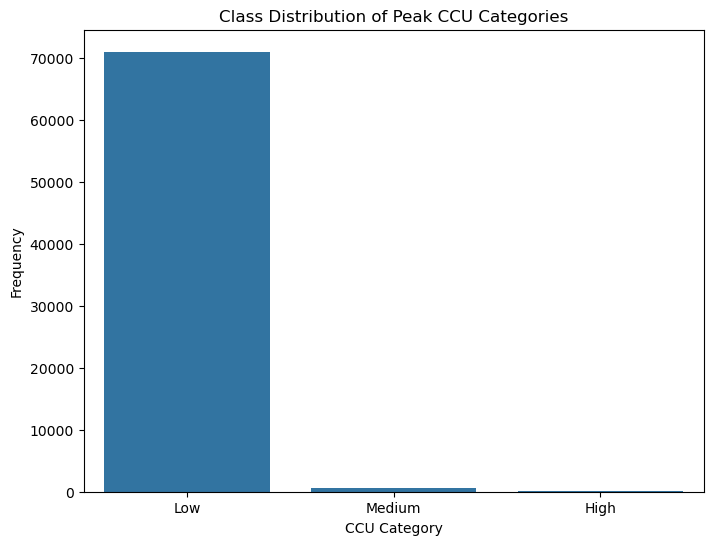

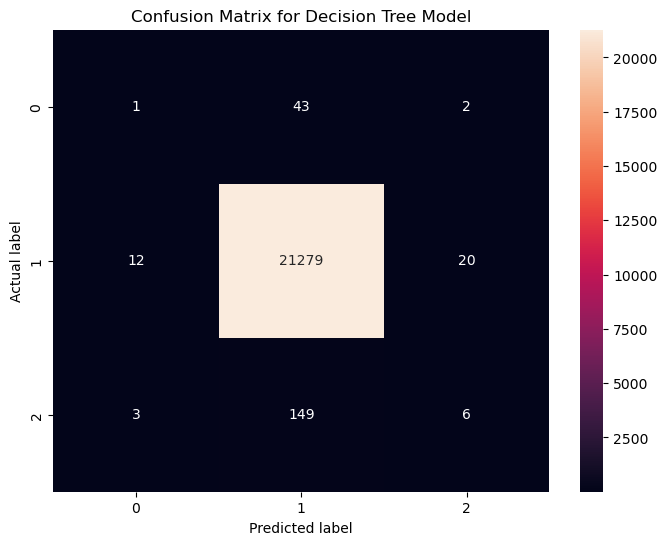

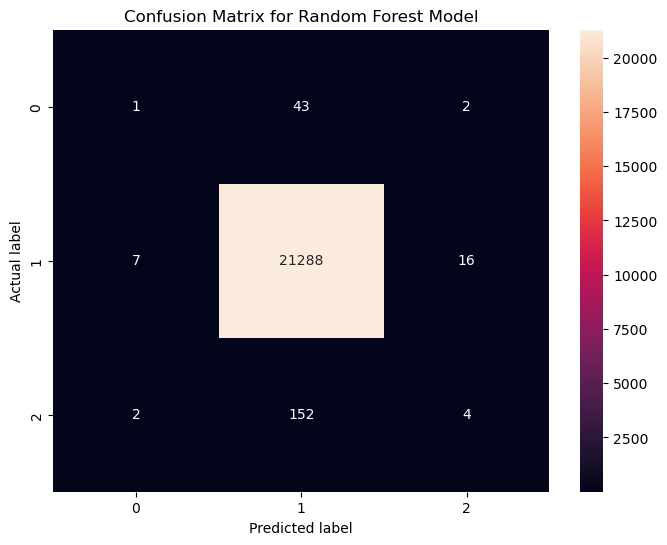

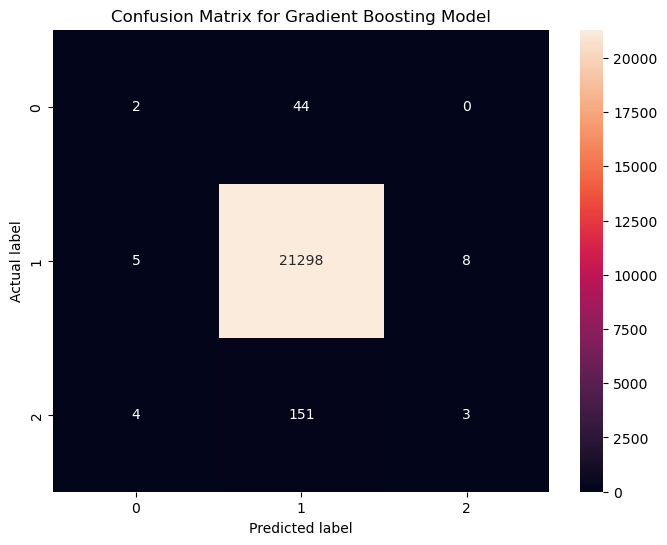

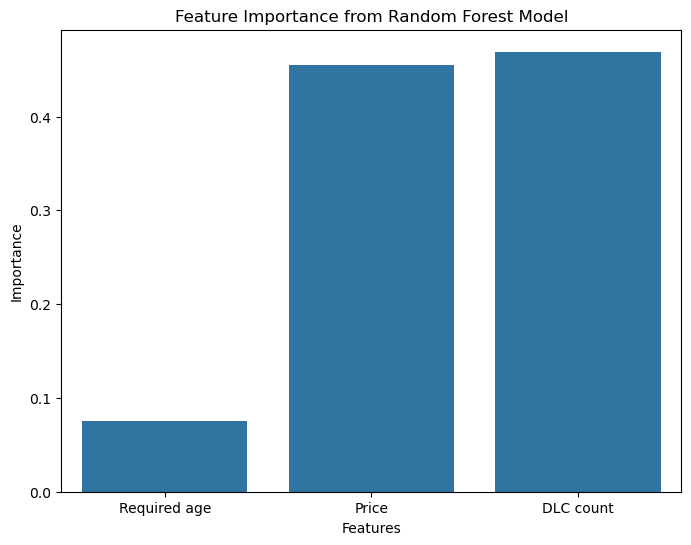

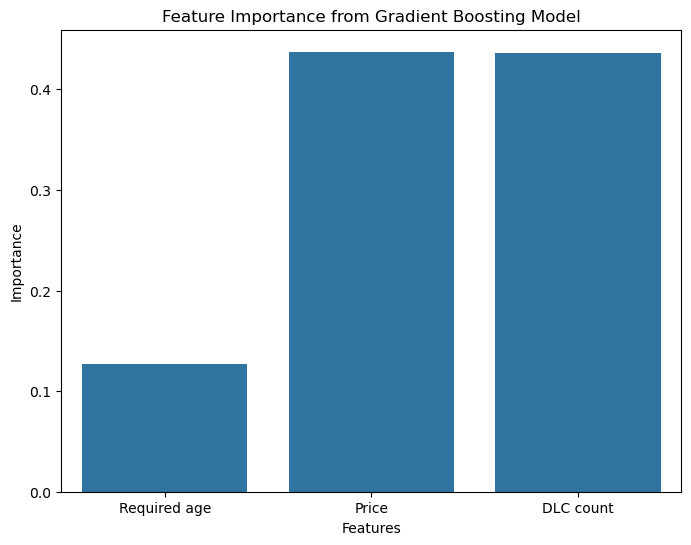

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# First, let's analyze the class distribution with a plot
class_counts = games_df_cleaned['CCU_Category'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Class Distribution of Peak CCU Categories')
plt.xlabel('CCU Category')
plt.ylabel('Frequency')
plt.show()

# Now, let's visualize the confusion matrices for the Decision Tree and Random Forest models
# Confusion Matrix for Decision Tree Model
dt_cm = confusion_matrix(y_test, dt_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(dt_cm, annot=True, fmt='d')
plt.title('Confusion Matrix for Decision Tree Model')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# Confusion Matrix for Random Forest Model
rf_cm = confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(rf_cm, annot=True, fmt='d')
plt.title('Confusion Matrix for Random Forest Model')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# Confusion Matrix for Gradient Boosting Model
gb_cm = confusion_matrix(y_test, gb_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(gb_cm, annot=True, fmt='d')
plt.title('Confusion Matrix for Gradient Boosting Model')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# Feature Importance from Random Forest
rf_feature_importance = rf_classifier.feature_importances_
plt.figure(figsize=(8, 6))
sns.barplot(x=features, y=rf_feature_importance)
plt.title('Feature Importance from Random Forest Model')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

# Feature Importance from Gradient Boosting
gb_feature_importance = gb_classifier.feature_importances_
plt.figure(figsize=(8, 6))
sns.barplot(x=features, y=gb_feature_importance)
plt.title('Feature Importance from Gradient Boosting Model')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()



In [9]:
import itertools


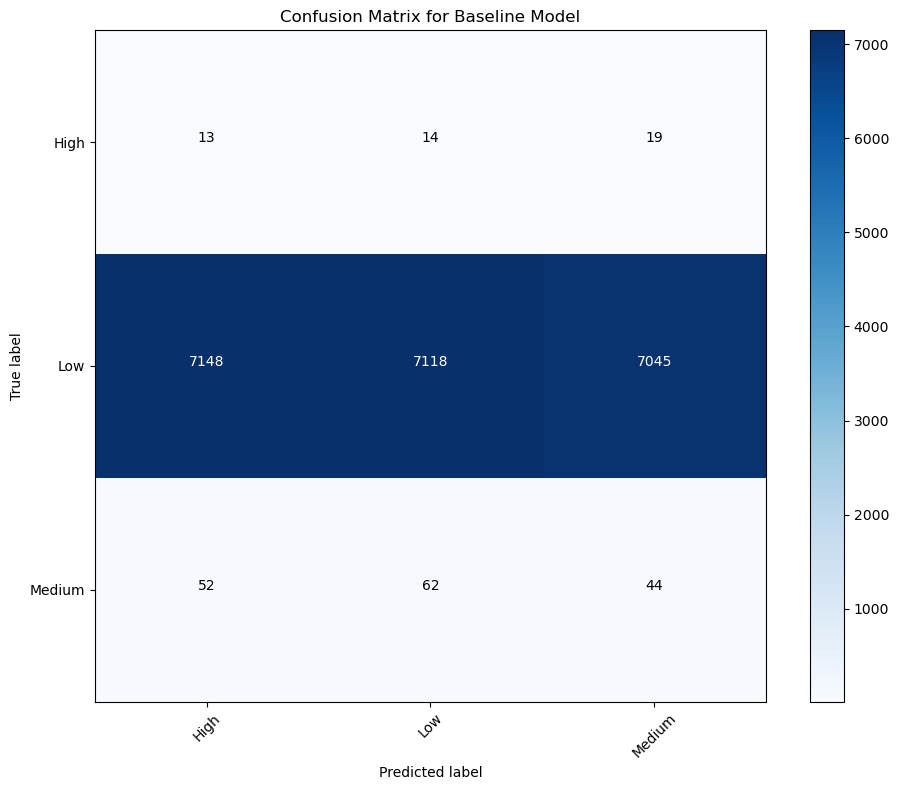

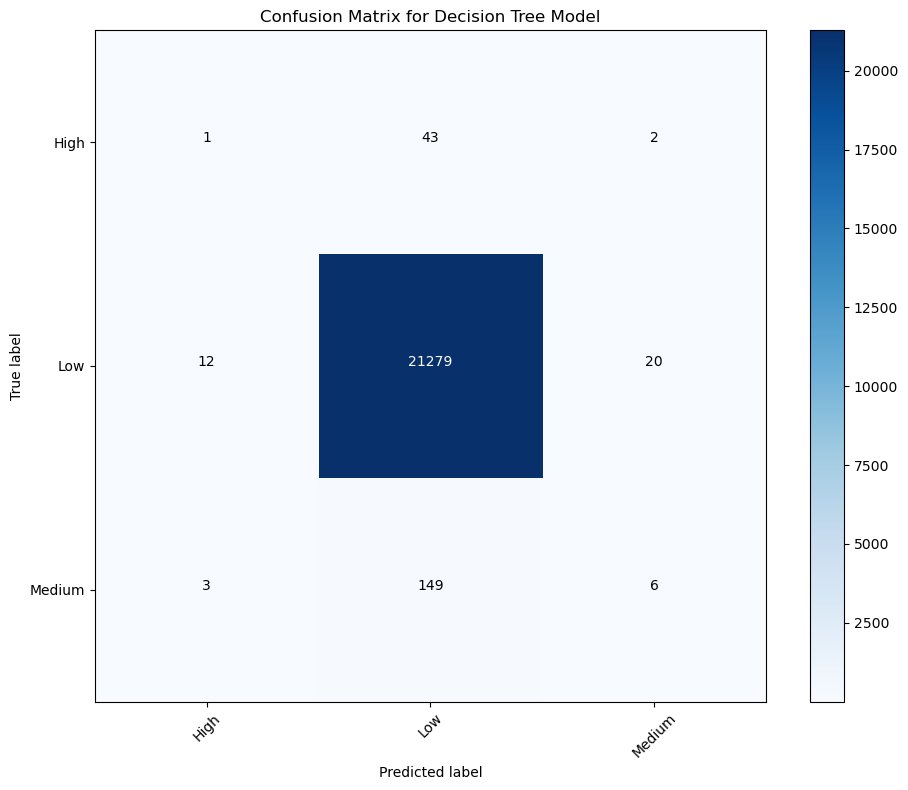

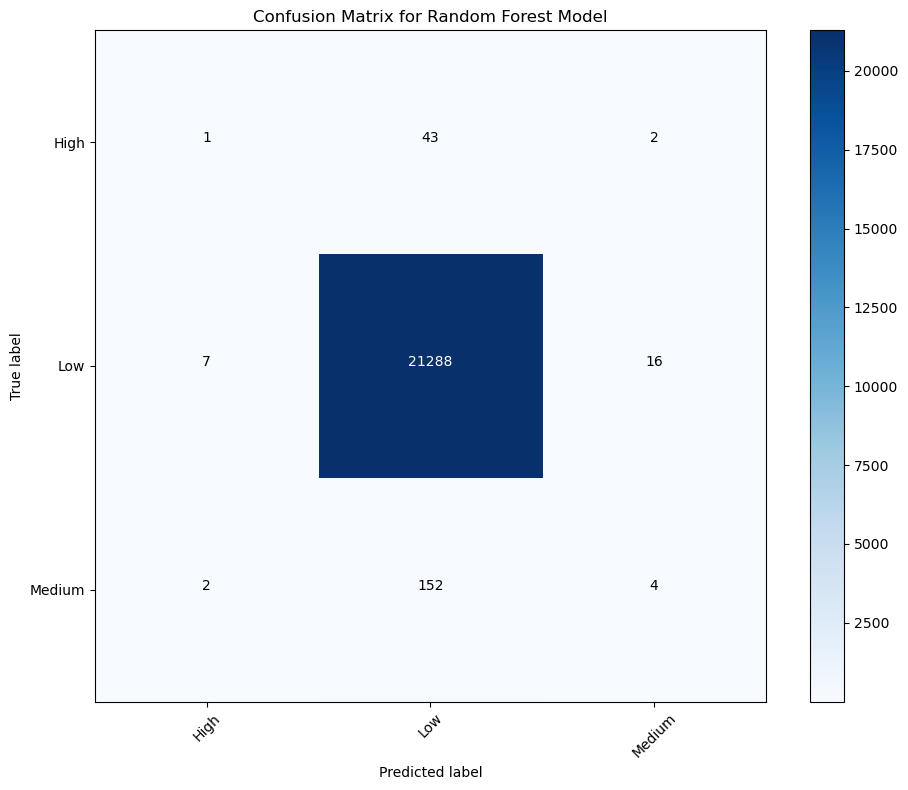

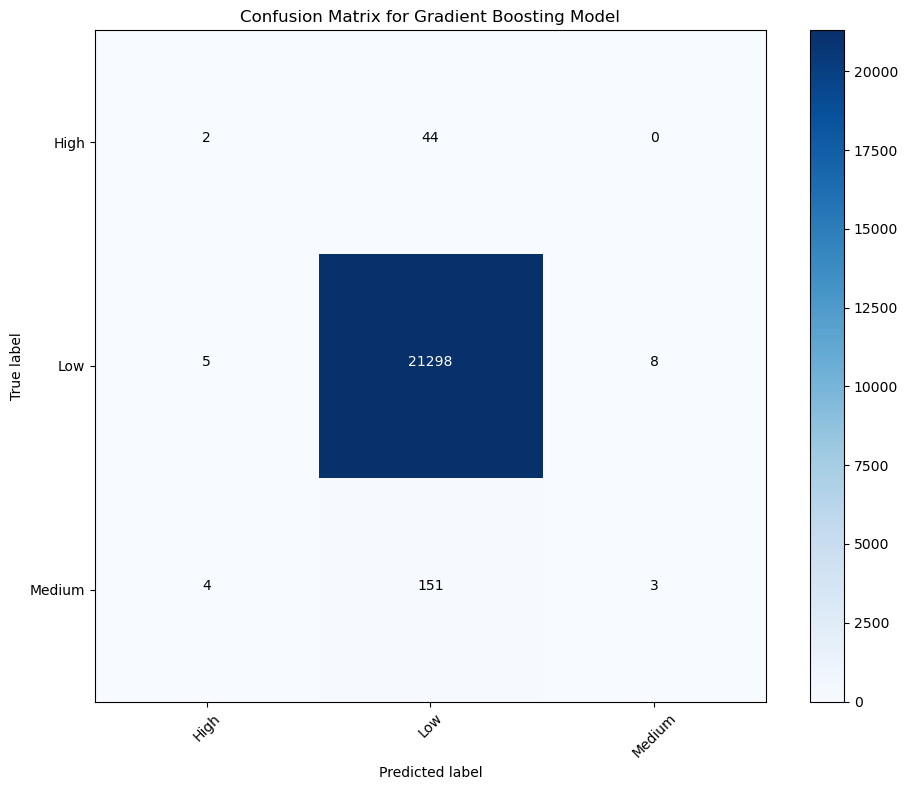

In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = range(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Function to plot ROC curve
def plot_roc_curve(y_test, y_score, title='ROC Curve'):
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

# Plotting Confusion Matrix for each model
cm_dummy = confusion_matrix(y_test, dummy_pred)
cm_dt = confusion_matrix(y_test, dt_pred)
cm_rf = confusion_matrix(y_test, rf_pred)
cm_gb = confusion_matrix(y_test, gb_pred)

plt.figure(figsize=(10, 8))
plot_confusion_matrix(cm_dummy, classes=label_encoder.classes_, title='Confusion Matrix for Baseline Model')
plt.show()

plt.figure(figsize=(10, 8))
plot_confusion_matrix(cm_dt, classes=label_encoder.classes_, title='Confusion Matrix for Decision Tree Model')
plt.show()

plt.figure(figsize=(10, 8))
plot_confusion_matrix(cm_rf, classes=label_encoder.classes_, title='Confusion Matrix for Random Forest Model')
plt.show()

plt.figure(figsize=(10, 8))
plot_confusion_matrix(cm_gb, classes=label_encoder.classes_, title='Confusion Matrix for Gradient Boosting Model')
plt.show()




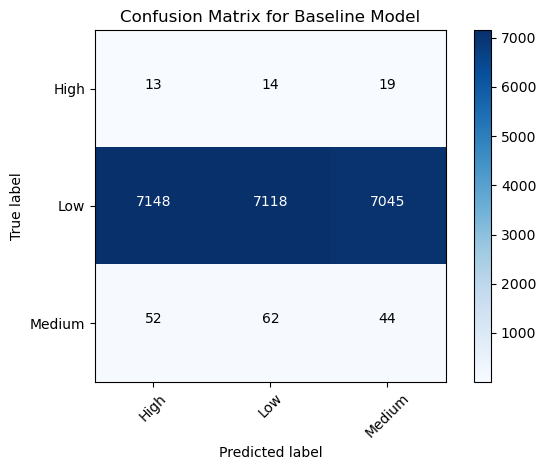

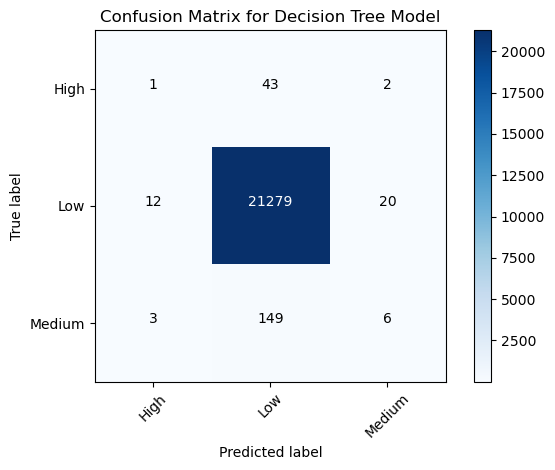

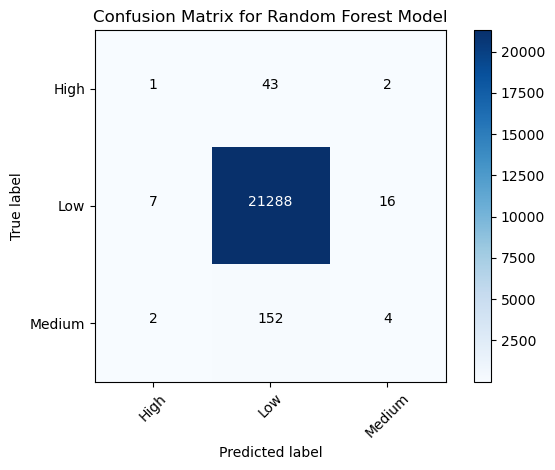

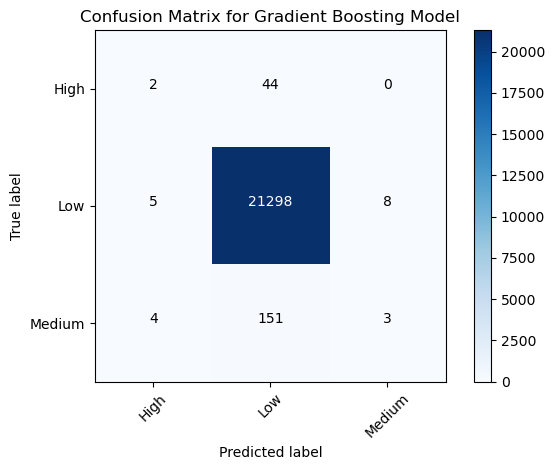

In [11]:
# It seems we need to import numpy as well. Let's import numpy and then plot the confusion matrices.
import numpy as np

# Plotting the confusion matrices again
plot_confusion_matrix(cm_dummy, classes=label_encoder.classes_, title='Confusion Matrix for Baseline Model')
plt.show()

plot_confusion_matrix(cm_dt, classes=label_encoder.classes_, title='Confusion Matrix for Decision Tree Model')
plt.show()

plot_confusion_matrix(cm_rf, classes=label_encoder.classes_, title='Confusion Matrix for Random Forest Model')
plt.show()

plot_confusion_matrix(cm_gb, classes=label_encoder.classes_, title='Confusion Matrix for Gradient Boosting Model')
plt.show()


In [8]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Part 5: Random Forest Model
# Creating and training the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Evaluating the Random Forest model
rf_pred = rf_classifier.predict(X_test)
print("Random Forest Model Evaluation:")
print("Classification Report:\n", classification_report(y_test, rf_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))

# Part 6: Gradient Boosting Model
# Creating and training the Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(random_state=42)
gb_classifier.fit(X_train, y_train)

# Evaluating the Gradient Boosting model
gb_pred = gb_classifier.predict(X_test)
print("\nGradient Boosting Model Evaluation:")
print("Classification Report:\n", classification_report(y_test, gb_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, gb_pred))


Random Forest Model Evaluation:
Classification Report:
               precision    recall  f1-score   support

           0       0.10      0.02      0.04        46
           1       0.99      1.00      0.99     21311
           2       0.18      0.03      0.04       158

    accuracy                           0.99     21515
   macro avg       0.42      0.35      0.36     21515
weighted avg       0.98      0.99      0.99     21515

Confusion Matrix:
 [[    1    43     2]
 [    7 21288    16]
 [    2   152     4]]

Gradient Boosting Model Evaluation:
Classification Report:
               precision    recall  f1-score   support

           0       0.18      0.04      0.07        46
           1       0.99      1.00      1.00     21311
           2       0.27      0.02      0.04       158

    accuracy                           0.99     21515
   macro avg       0.48      0.35      0.37     21515
weighted avg       0.98      0.99      0.99     21515

Confusion Matrix:
 [[    2    44     0